# EDA

In [1]:
import pandas as pd

#Define paths (since your notebook is inside 'subtask1/')
TRAIN_PATH = "train/arb.csv"
DEV_PATH   = "dev/arb.csv"

# Load the CSVs
train_df = pd.read_csv(TRAIN_PATH)
dev_df   = pd.read_csv(DEV_PATH)

# Display summary info
print("\n--- Data Loaded Successfully ---")
print(f"Train shape: {train_df.shape}")
print(f"Dev shape:   {dev_df.shape}")
print("\nTrain columns:", list(train_df.columns))
print("Dev columns:", list(dev_df.columns))


--- Data Loaded Successfully ---
Train shape: (3380, 3)
Dev shape:   (169, 3)

Train columns: ['id', 'text', 'polarization']
Dev columns: ['id', 'text', 'polarization']


In [2]:
# Basic EDA on Training Set
# 1. Dataset overview
print("=" * 50)
print("TRAINING SET OVERVIEW")
print("=" * 50)
print(f"\nData types:\n{train_df.dtypes}")
# 2. Missing values
print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
print(train_df.isnull().sum())

TRAINING SET OVERVIEW

Data types:
id              object
text            object
polarization     int64
dtype: object

MISSING VALUES
id              0
text            0
polarization    0
dtype: int64


POLARIZATION DISTRIBUTION

📘 Polarization Label Meaning:
Polarized (True = 1)  → the text contains or expresses a polarized opinion.
Non-Polarized (False = 0) → the text does NOT contain polarized opinion (neutral or balanced).

Counts:
polarization
0    1868
1    1512
Name: count, dtype: int64

Percentages:
polarization
0    55.266272
1    44.733728
Name: proportion, dtype: float64


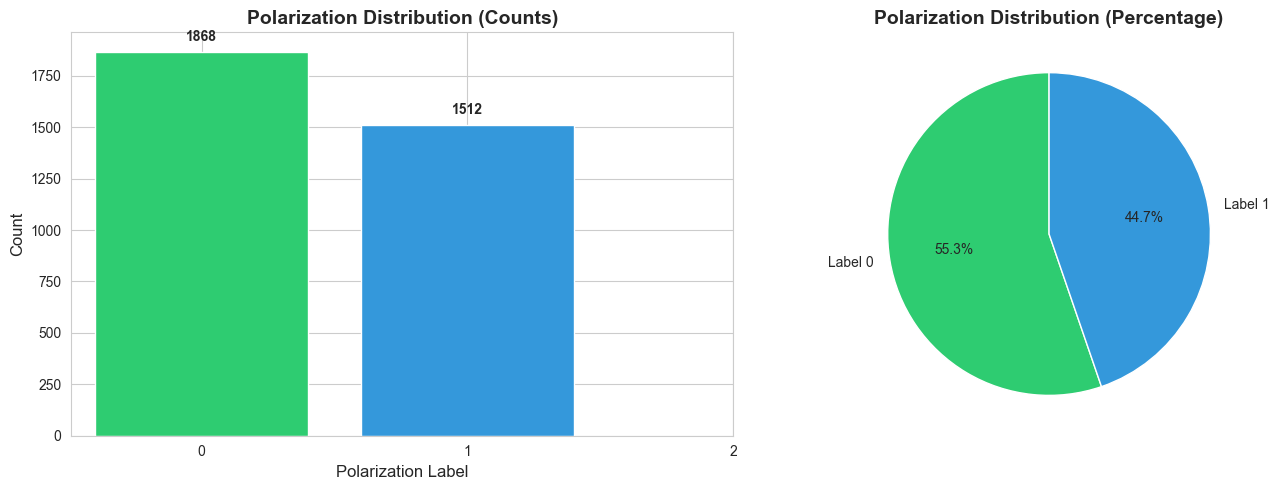

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Polarization distribution
print("=" * 50)
print("POLARIZATION DISTRIBUTION")
print("=" * 50)

# Count and percentage
label_counts = train_df['polarization'].value_counts().sort_index()
label_percentages = train_df['polarization'].value_counts(normalize=True).sort_index() * 100

print("\n📘 Polarization Label Meaning:")
print("Polarized (True = 1)  → the text contains or expresses a polarized opinion.")
print("Non-Polarized (False = 0) → the text does NOT contain polarized opinion (neutral or balanced).")

print("\nCounts:")
print(label_counts)
print("\nPercentages:")
print(label_percentages)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(label_counts.index, label_counts.values, color=['#2ecc71', '#3498db', '#e74c3c'])
axes[0].set_xlabel('Polarization Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Polarization Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1, 2])
for i, v in enumerate(label_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[1].pie(label_counts.values, labels=[f'Label {i}' for i in label_counts.index], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Polarization Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


TEXT CHARACTER ANALYSIS

📊 Length Statistics:
Average text length: 94.76 characters
Median text length: 88.00 characters
Min text length: 22 characters
Max text length: 465 characters
Std deviation: 44.57

📝 Word Statistics:
Average word count: 16.71 words
Average word length: 5.73 characters


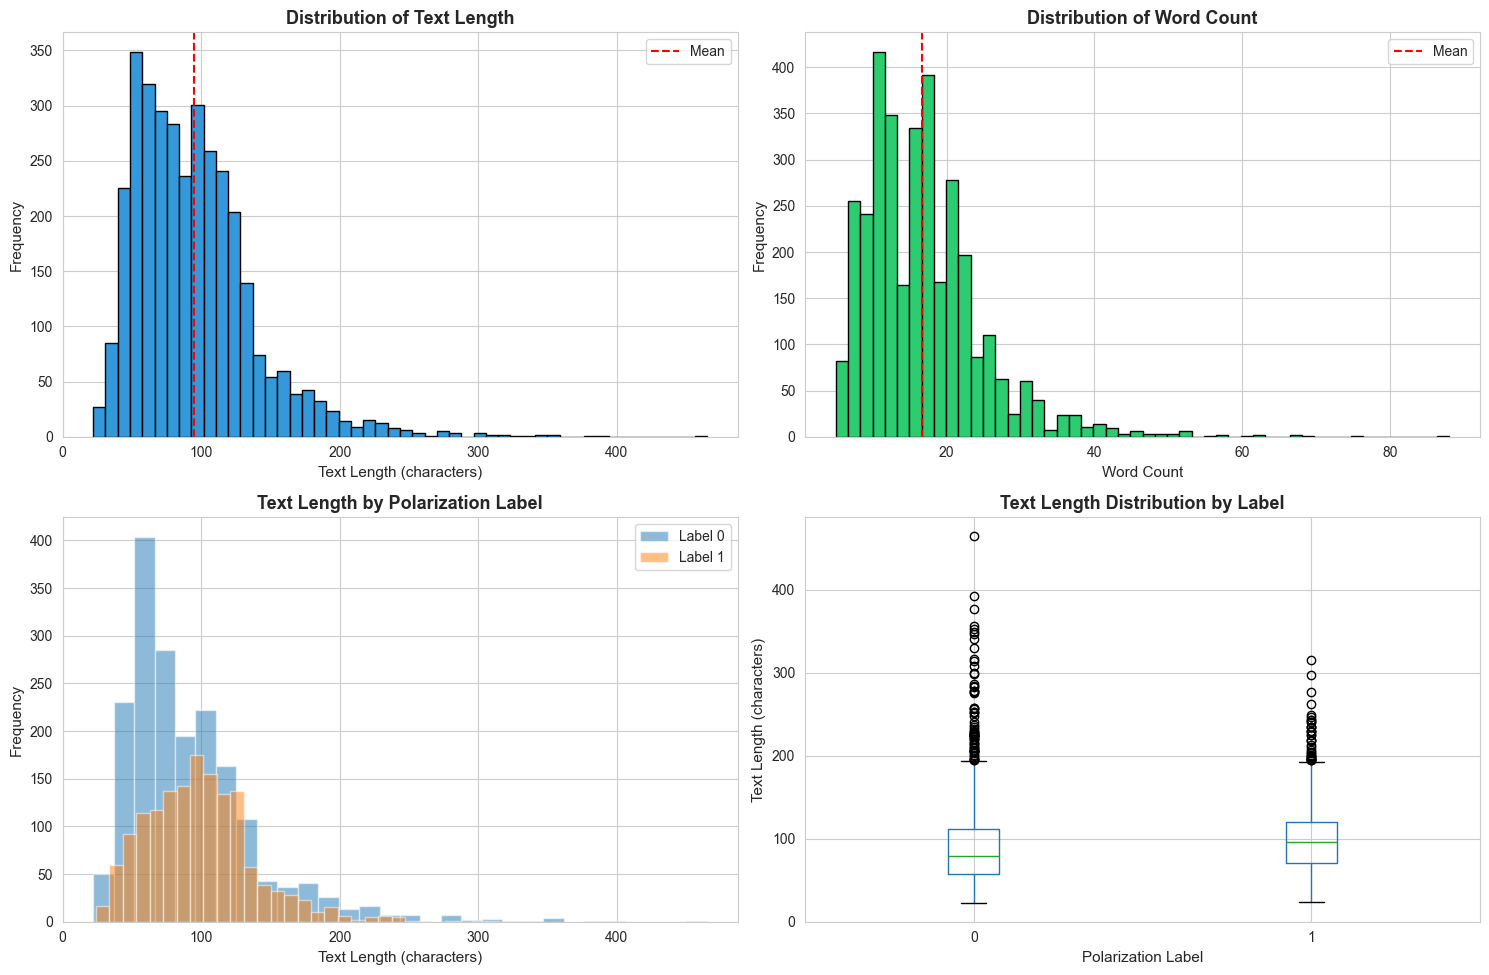


TEXT LENGTH BY POLARIZATION LABEL
               count       mean        std   min   25%   50%    75%    max
polarization                                                              
0             1868.0  91.403105  48.270170  22.0  57.0  79.0  112.0  465.0
1             1512.0  98.904101  39.135167  24.0  71.0  96.0  120.0  315.0


In [4]:
# Text Character Analysis

print("=" * 50)
print("TEXT CHARACTER ANALYSIS")
print("=" * 50)

# Calculate text statistics
train_df['text_length'] = train_df['text'].str.len()
train_df['word_count'] = train_df['text'].str.split().str.len()
train_df['avg_word_length'] = train_df['text_length'] / train_df['word_count']

# Summary statistics
print("\n📊 Length Statistics:")
print(f"Average text length: {train_df['text_length'].mean():.2f} characters")
print(f"Median text length: {train_df['text_length'].median():.2f} characters")
print(f"Min text length: {train_df['text_length'].min()} characters")
print(f"Max text length: {train_df['text_length'].max()} characters")
print(f"Std deviation: {train_df['text_length'].std():.2f}")

print("\n📝 Word Statistics:")
print(f"Average word count: {train_df['word_count'].mean():.2f} words")
print(f"Average word length: {train_df['avg_word_length'].mean():.2f} characters")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Text length distribution
axes[0, 0].hist(train_df['text_length'], bins=50, color='#3498db', edgecolor='black')
axes[0, 0].set_xlabel('Text Length (characters)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Text Length', fontsize=13, fontweight='bold')
axes[0, 0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()

# 2. Word count distribution
axes[0, 1].hist(train_df['word_count'], bins=50, color='#2ecc71', edgecolor='black')
axes[0, 1].set_xlabel('Word Count', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Word Count', fontsize=13, fontweight='bold')
axes[0, 1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 1].legend()

# 3. Text length by polarization label
for label in sorted(train_df['polarization'].unique()):
    axes[1, 0].hist(train_df[train_df['polarization'] == label]['text_length'], 
                    bins=30, alpha=0.5, label=f'Label {label}')
axes[1, 0].set_xlabel('Text Length (characters)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Text Length by Polarization Label', fontsize=13, fontweight='bold')
axes[1, 0].legend()

# 4. Boxplot of text length by label
train_df.boxplot(column='text_length', by='polarization', ax=axes[1, 1])
axes[1, 1].set_xlabel('Polarization Label', fontsize=11)
axes[1, 1].set_ylabel('Text Length (characters)', fontsize=11)
axes[1, 1].set_title('Text Length Distribution by Label', fontsize=13, fontweight='bold')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Text length statistics by label
print("\n" + "=" * 50)
print("TEXT LENGTH BY POLARIZATION LABEL")
print("=" * 50)
print(train_df.groupby('polarization')['text_length'].describe())


ARABIC, NUMERIC & ENGLISH CHARACTER ANALYSIS

📊 Presence Statistics:
Texts with numbers (any): 364 (10.77%)
Texts with Latin numbers (0-9): 319 (9.44%)
Texts with Arabic-Indic numbers (٠-٩): 46 (1.36%)
Texts with English characters: 55 (1.63%)

📈 Count Statistics:
Average numbers per text: 0.38
Average English chars per text: 0.12
Max numbers in a text: 20
Max English chars in a text: 28


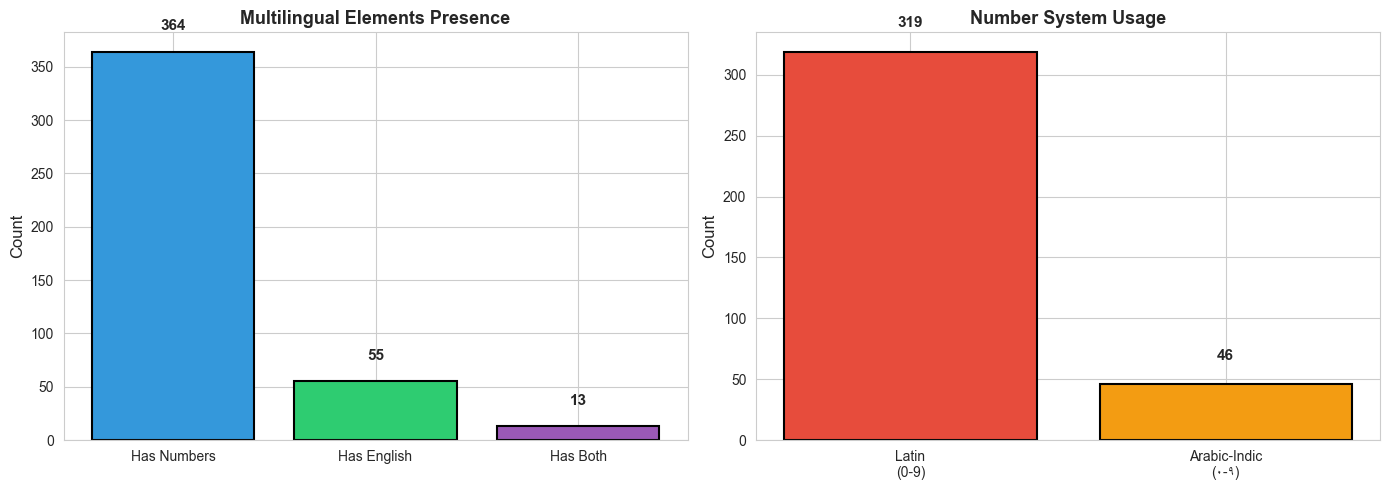


BY POLARIZATION LABEL

Texts with Numbers:
polarization
0    300
1     64
Name: has_numbers, dtype: int64

Texts with English:
polarization
0    34
1    21
Name: has_english, dtype: int64

Texts with Latin Numbers:
polarization
0    274
1     45
Name: has_latin_numbers, dtype: int64

EXAMPLES

🔤 Examples with ENGLISH CHARACTERS:
--------------------------------------------------

Label: 1
Text: مين عم يقول الdislikeأكتر؟؟؟ههههه
ياحبيبي طلعت شاذة كمان هاد الناقص
يلعن شكلك بومة مسخرة بس يلعن أبو المصاري
تضربي بس شوفك بستفرغ...
English char count: 7

Label: 1
Text: ليش  بصلتكم محرووقه؟؟!!  KISS  اخت الاعلام ,  و كس  اخت احلام  معها  مصاري   وبتذل  الاعلام.....
English char count: 4

Label: 1
Text: رجال الخليج يحبون اللواط والان نساء الخليج احلام she lesbian عالم عالم العاهرين والعاهرات...
English char count: 10


🔢 Examples with LATIN NUMBERS (0-9):
--------------------------------------------------

Label: 1
Text: أول شي انتي تشبهين شغالتنا في البيت

ثاني شي انتي ملكة جمال الإزباله

3 ج

In [5]:
# Analysis of Numbers and English Characters

print("=" * 50)
print("ARABIC, NUMERIC & ENGLISH CHARACTER ANALYSIS")
print("=" * 50)

# Check for numbers and English characters
train_df['has_numbers'] = train_df['text'].str.contains(r'\d', regex=True)
train_df['has_english'] = train_df['text'].str.contains(r'[a-zA-Z]', regex=True)
train_df['has_latin_numbers'] = train_df['text'].str.contains(r'[0-9]', regex=True)
train_df['has_arabic_numbers'] = train_df['text'].str.contains(r'[٠-٩]', regex=True)

train_df['num_count'] = train_df['text'].str.count(r'\d')
train_df['english_char_count'] = train_df['text'].str.count(r'[a-zA-Z]')

# Summary statistics
print("\n📊 Presence Statistics:")
print(f"Texts with numbers (any): {train_df['has_numbers'].sum()} ({train_df['has_numbers'].mean()*100:.2f}%)")
print(f"Texts with Latin numbers (0-9): {train_df['has_latin_numbers'].sum()} ({train_df['has_latin_numbers'].mean()*100:.2f}%)")
print(f"Texts with Arabic-Indic numbers (٠-٩): {train_df['has_arabic_numbers'].sum()} ({train_df['has_arabic_numbers'].mean()*100:.2f}%)")
print(f"Texts with English characters: {train_df['has_english'].sum()} ({train_df['has_english'].mean()*100:.2f}%)")

print("\n📈 Count Statistics:")
print(f"Average numbers per text: {train_df['num_count'].mean():.2f}")
print(f"Average English chars per text: {train_df['english_char_count'].mean():.2f}")
print(f"Max numbers in a text: {train_df['num_count'].max()}")
print(f"Max English chars in a text: {train_df['english_char_count'].max()}")

# Improved Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Combined presence chart
categories = ['Has Numbers', 'Has English', 'Has Both']
counts = [
    train_df['has_numbers'].sum(),
    train_df['has_english'].sum(),
    (train_df['has_numbers'] & train_df['has_english']).sum()
]
colors_combo = ['#3498db', '#2ecc71', '#9b59b6']

axes[0].bar(categories, counts, color=colors_combo, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Multilingual Elements Presence', fontsize=13, fontweight='bold')
for i, v in enumerate(counts):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold', fontsize=11)

# 2. Number system comparison
num_systems = ['Latin\n(0-9)', 'Arabic-Indic\n(٠-٩)']
num_counts = [
    train_df['has_latin_numbers'].sum(),
    train_df['has_arabic_numbers'].sum()
]
colors_nums = ['#e74c3c', '#f39c12']

axes[1].bar(num_systems, num_counts, color=colors_nums, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Number System Usage', fontsize=13, fontweight='bold')
for i, v in enumerate(num_counts):
    axes[1].text(i, v + 20, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Analysis by polarization label
print("\n" + "=" * 50)
print("BY POLARIZATION LABEL")
print("=" * 50)
print("\nTexts with Numbers:")
print(train_df.groupby('polarization')['has_numbers'].sum())
print("\nTexts with English:")
print(train_df.groupby('polarization')['has_english'].sum())
print("\nTexts with Latin Numbers:")
print(train_df.groupby('polarization')['has_latin_numbers'].sum())

# Examples of texts with numbers and English characters
print("\n" + "=" * 50)
print("EXAMPLES")
print("=" * 50)

print("\n🔤 Examples with ENGLISH CHARACTERS:")
print("-" * 50)
texts_with_english = train_df[train_df['has_english']].head(3)
for idx, row in texts_with_english.iterrows():
    print(f"\nLabel: {row['polarization']}")
    print(f"Text: {row['text'][:200]}...")
    print(f"English char count: {row['english_char_count']}")

print("\n\n🔢 Examples with LATIN NUMBERS (0-9):")
print("-" * 50)
texts_with_latin = train_df[train_df['has_latin_numbers']].head(3)
for idx, row in texts_with_latin.iterrows():
    print(f"\nLabel: {row['polarization']}")
    print(f"Text: {row['text'][:200]}...")
    print(f"Latin number count: {row['text'].count('0') + row['text'].count('1') + row['text'].count('2') + row['text'].count('3') + row['text'].count('4') + row['text'].count('5') + row['text'].count('6') + row['text'].count('7') + row['text'].count('8') + row['text'].count('9')}")

print("\n\n📊 Examples with ARABIC-INDIC NUMBERS (٠-٩):")
print("-" * 50)
arabic_num_examples = train_df[train_df['has_arabic_numbers']].head(3)
if len(arabic_num_examples) > 0:
    for idx, row in arabic_num_examples.iterrows():
        print(f"\nLabel: {row['polarization']}")
        print(f"Text: {row['text'][:200]}...")
else:
    print("No texts found with Arabic-Indic numbers.")

EMOJI ANALYSIS

📊 Emoji Presence Statistics:
Texts with emojis: 280 (8.28%)
Texts without emojis: 3100 (91.72%)

📈 Emoji Count Statistics:
Total emojis in dataset: 828
Average emojis per text: 0.24
Average emojis per text (with emojis): 2.96
Max emojis in a text: 25


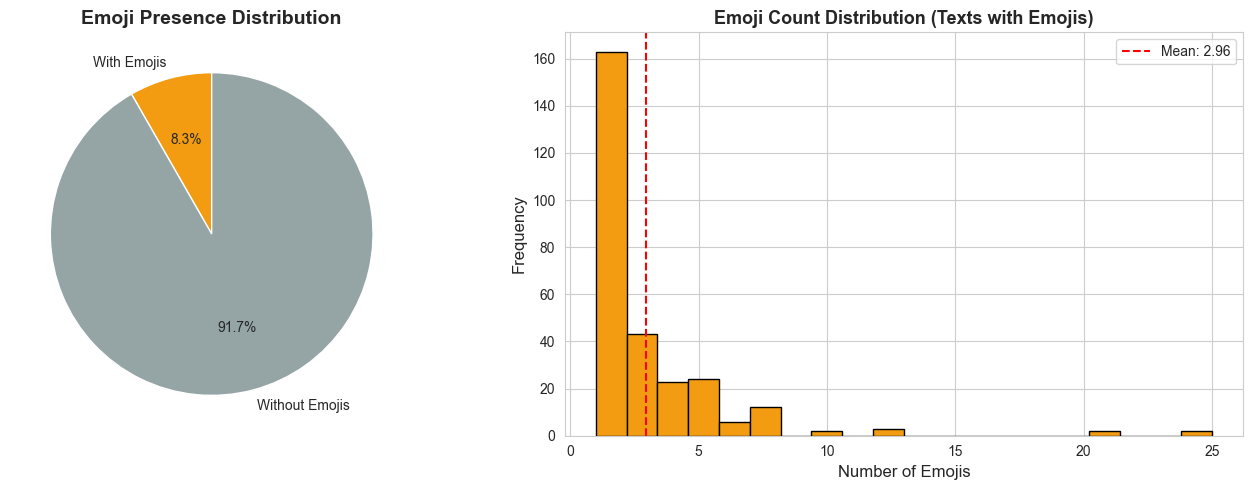


EMOJI USAGE BY POLARIZATION LABEL

Texts with Emojis by Label:
polarization
0    112
1    168
Name: has_emoji, dtype: int64

Emoji Presence Percentage by Label:
polarization
0     5.995717
1    11.111111
Name: has_emoji, dtype: float64

Average Emoji Count by Label:
polarization
0    0.177195
1    0.328704
Name: emoji_count, dtype: float64

EXAMPLES WITH EMOJIS

Label: 1
Emoji count: 2
Text: والله ان شمس احلى منك ي اطقاقه ع اقل شمس احساس وجمال انتي لا احساس ولا جمال هيا اخررجي ي طقاقه 😂😂
Emojis found: 😂 😂

Label: 1
Emoji count: 8
Text: مريضة نفسية مفتكرة حالها بشرية و شكلها غربي😂😂😂😂و تلبس تياب قد بنت بنتها 😂😂😂😂
Emojis found: 😂 😂 😂 😂 😂 😂 😂 😂

Label: 1
Emoji count: 1
Text: نام سه اجل 😝 سبحان من جمعكم بقرة وثور
Emojis found: 😝


In [6]:
# Emoji Analysis

print("=" * 50)
print("EMOJI ANALYSIS")
print("=" * 50)

import re
import emoji

# Function to detect emojis using the emoji library
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

# Apply emoji detection
train_df['has_emoji'] = train_df['text'].apply(contains_emoji)
train_df['emoji_count'] = train_df['text'].apply(count_emojis)

# Summary statistics
print("\n📊 Emoji Presence Statistics:")
print(f"Texts with emojis: {train_df['has_emoji'].sum()} ({train_df['has_emoji'].mean()*100:.2f}%)")
print(f"Texts without emojis: {(~train_df['has_emoji']).sum()} ({(~train_df['has_emoji']).mean()*100:.2f}%)")

print("\n📈 Emoji Count Statistics:")
print(f"Total emojis in dataset: {train_df['emoji_count'].sum()}")
print(f"Average emojis per text: {train_df['emoji_count'].mean():.2f}")
if train_df['has_emoji'].sum() > 0:
    print(f"Average emojis per text (with emojis): {train_df[train_df['has_emoji']]['emoji_count'].mean():.2f}")
print(f"Max emojis in a text: {train_df['emoji_count'].max()}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Emoji presence pie chart
emoji_presence = [train_df['has_emoji'].sum(), (~train_df['has_emoji']).sum()]
labels_emoji = ['With Emojis', 'Without Emojis']
colors_emoji = ['#f39c12', '#95a5a6']

axes[0].pie(emoji_presence, labels=labels_emoji, autopct='%1.1f%%', 
            colors=colors_emoji, startangle=90)
axes[0].set_title('Emoji Presence Distribution', fontsize=14, fontweight='bold')

# 2. Emoji count distribution (for texts with emojis)
texts_with_emojis = train_df[train_df['has_emoji']]['emoji_count']
if len(texts_with_emojis) > 0:
    axes[1].hist(texts_with_emojis, bins=min(20, int(texts_with_emojis.max())), 
                 color='#f39c12', edgecolor='black')
    axes[1].set_xlabel('Number of Emojis', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].set_title('Emoji Count Distribution (Texts with Emojis)', fontsize=13, fontweight='bold')
    axes[1].axvline(texts_with_emojis.mean(), color='red', linestyle='--', label=f'Mean: {texts_with_emojis.mean():.2f}')
    axes[1].legend()
else:
    axes[1].text(0.5, 0.5, 'No emojis found', ha='center', va='center', fontsize=14)
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Analysis by polarization label
print("\n" + "=" * 50)
print("EMOJI USAGE BY POLARIZATION LABEL")
print("=" * 50)
print("\nTexts with Emojis by Label:")
print(train_df.groupby('polarization')['has_emoji'].sum())
print("\nEmoji Presence Percentage by Label:")
print(train_df.groupby('polarization')['has_emoji'].mean() * 100)
print("\nAverage Emoji Count by Label:")
print(train_df.groupby('polarization')['emoji_count'].mean())

# Examples
print("\n" + "=" * 50)
print("EXAMPLES WITH EMOJIS")
print("=" * 50)

texts_with_emojis_df = train_df[train_df['has_emoji']].head(3)
if len(texts_with_emojis_df) > 0:
    for idx, row in texts_with_emojis_df.iterrows():
        print(f"\n{'='*50}")
        print(f"Label: {row['polarization']}")
        print(f"Emoji count: {row['emoji_count']}")
        print(f"Text: {row['text']}")
        # Extract and show the actual emojis
        emojis_found = [char for char in row['text'] if char in emoji.EMOJI_DATA]
        print(f"Emojis found: {' '.join(emojis_found)}")
else:
    print("\nNo texts with emojis found in the dataset.")

URL, MENTION & HASHTAG ANALYSIS

📊 Presence Statistics:
Texts with URLs: 0 (0.00%)
Texts with @mentions: 0 (0.00%)
Texts with #hashtags: 188 (5.56%)

📈 Count Statistics:
Total URLs: 0
Total @mentions: 0
Total #hashtags: 356

Average URLs per text: 0.00
Average @mentions per text: 0.00
Average #hashtags per text: 0.11
Average #hashtags per text (with hashtags): 1.89

Max URLs in a text: 0
Max @mentions in a text: 0
Max #hashtags in a text: 14


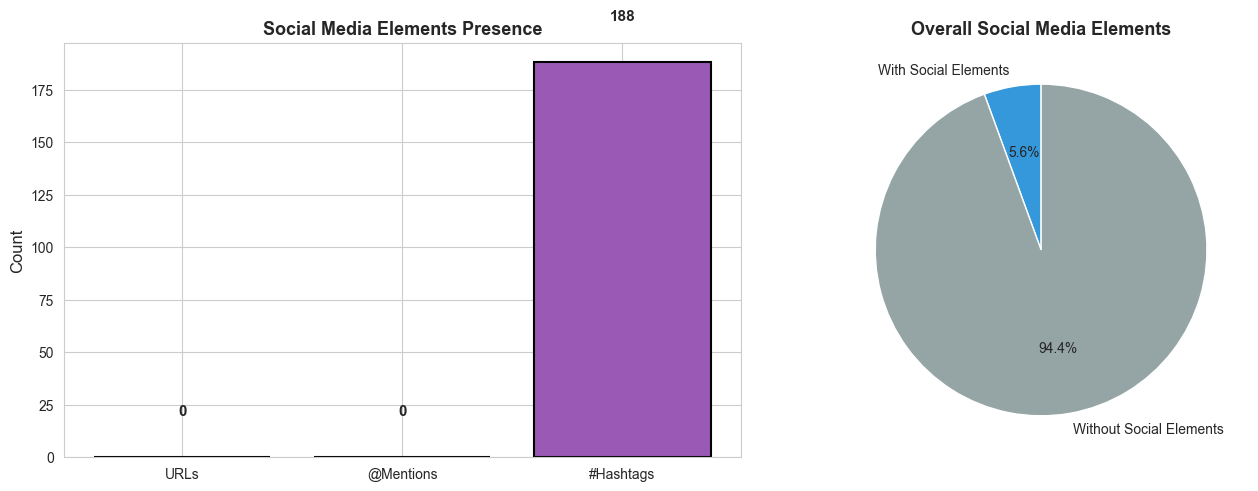


BY POLARIZATION LABEL

Texts with URLs:
polarization
0    0
1    0
Name: has_url, dtype: int64

Texts with @Mentions:
polarization
0    0
1    0
Name: has_mention, dtype: int64

Texts with #Hashtags:
polarization
0    153
1     35
Name: has_hashtag, dtype: int64

EXAMPLES

🔗 Examples with URLs:
--------------------------------------------------
No texts with URLs found.


👤 Examples with @Mentions:
--------------------------------------------------
No texts with @mentions found.


#️⃣ Examples with #Hashtags:
--------------------------------------------------

Label: 1
Hashtag count: 1
Text: كاضم يسواكم كلكم واحنه العراقين نفتخر ان كاضم عراقي،#مضغوطين...
Hashtags: #مضغوطين


In [7]:
# URL, Mention, and Hashtag Analysis

print("=" * 50)
print("URL, MENTION & HASHTAG ANALYSIS")
print("=" * 50)

import re

# Define regex patterns
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mention_pattern = re.compile(r'@[\w]+')
hashtag_pattern = re.compile(r'#[\w]+')

# Detection functions
def contains_url(text):
    return bool(url_pattern.search(text))

def contains_mention(text):
    return bool(mention_pattern.search(text))

def contains_hashtag(text):
    return bool(hashtag_pattern.search(text))

def count_urls(text):
    return len(url_pattern.findall(text))

def count_mentions(text):
    return len(mention_pattern.findall(text))

def count_hashtags(text):
    return len(hashtag_pattern.findall(text))

# Apply detection
train_df['has_url'] = train_df['text'].apply(contains_url)
train_df['has_mention'] = train_df['text'].apply(contains_mention)
train_df['has_hashtag'] = train_df['text'].apply(contains_hashtag)

train_df['url_count'] = train_df['text'].apply(count_urls)
train_df['mention_count'] = train_df['text'].apply(count_mentions)
train_df['hashtag_count'] = train_df['text'].apply(count_hashtags)

# Summary statistics
print("\n📊 Presence Statistics:")
print(f"Texts with URLs: {train_df['has_url'].sum()} ({train_df['has_url'].mean()*100:.2f}%)")
print(f"Texts with @mentions: {train_df['has_mention'].sum()} ({train_df['has_mention'].mean()*100:.2f}%)")
print(f"Texts with #hashtags: {train_df['has_hashtag'].sum()} ({train_df['has_hashtag'].mean()*100:.2f}%)")

print("\n📈 Count Statistics:")
print(f"Total URLs: {train_df['url_count'].sum()}")
print(f"Total @mentions: {train_df['mention_count'].sum()}")
print(f"Total #hashtags: {train_df['hashtag_count'].sum()}")

print(f"\nAverage URLs per text: {train_df['url_count'].mean():.2f}")
print(f"Average @mentions per text: {train_df['mention_count'].mean():.2f}")
print(f"Average #hashtags per text: {train_df['hashtag_count'].mean():.2f}")

if train_df['has_url'].sum() > 0:
    print(f"Average URLs per text (with URLs): {train_df[train_df['has_url']]['url_count'].mean():.2f}")
if train_df['has_mention'].sum() > 0:
    print(f"Average @mentions per text (with mentions): {train_df[train_df['has_mention']]['mention_count'].mean():.2f}")
if train_df['has_hashtag'].sum() > 0:
    print(f"Average #hashtags per text (with hashtags): {train_df[train_df['has_hashtag']]['hashtag_count'].mean():.2f}")

print(f"\nMax URLs in a text: {train_df['url_count'].max()}")
print(f"Max @mentions in a text: {train_df['mention_count'].max()}")
print(f"Max #hashtags in a text: {train_df['hashtag_count'].max()}")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Presence bar chart
categories = ['URLs', '@Mentions', '#Hashtags']
counts = [
    train_df['has_url'].sum(),
    train_df['has_mention'].sum(),
    train_df['has_hashtag'].sum()
]
colors_social = ['#3498db', '#e74c3c', '#9b59b6']

axes[0].bar(categories, counts, color=colors_social, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Social Media Elements Presence', fontsize=13, fontweight='bold')
for i, v in enumerate(counts):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold', fontsize=11)

# 2. Pie chart for texts with any social media element
has_any_social = train_df['has_url'] | train_df['has_mention'] | train_df['has_hashtag']
social_presence = [has_any_social.sum(), (~has_any_social).sum()]
labels_social = ['With Social Elements', 'Without Social Elements']
colors_pie = ['#3498db', '#95a5a6']

axes[1].pie(social_presence, labels=labels_social, autopct='%1.1f%%', 
            colors=colors_pie, startangle=90)
axes[1].set_title('Overall Social Media Elements', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Analysis by polarization label
print("\n" + "=" * 50)
print("BY POLARIZATION LABEL")
print("=" * 50)
print("\nTexts with URLs:")
print(train_df.groupby('polarization')['has_url'].sum())
print("\nTexts with @Mentions:")
print(train_df.groupby('polarization')['has_mention'].sum())
print("\nTexts with #Hashtags:")
print(train_df.groupby('polarization')['has_hashtag'].sum())

# Examples
print("\n" + "=" * 50)
print("EXAMPLES")
print("=" * 50)

print("\n🔗 Examples with URLs:")
print("-" * 50)
texts_with_urls = train_df[train_df['has_url']].head(1)
if len(texts_with_urls) > 0:
    for idx, row in texts_with_urls.iterrows():
        print(f"\nLabel: {row['polarization']}")
        print(f"URL count: {row['url_count']}")
        print(f"Text: {row['text'][:300]}...")
else:
    print("No texts with URLs found.")

print("\n\n👤 Examples with @Mentions:")
print("-" * 50)
texts_with_mentions = train_df[train_df['has_mention']].head(1)
if len(texts_with_mentions) > 0:
    for idx, row in texts_with_mentions.iterrows():
        print(f"\nLabel: {row['polarization']}")
        print(f"Mention count: {row['mention_count']}")
        print(f"Text: {row['text'][:300]}...")
        mentions_found = mention_pattern.findall(row['text'])
        print(f"Mentions: {', '.join(mentions_found)}")
else:
    print("No texts with @mentions found.")

print("\n\n#️⃣ Examples with #Hashtags:")
print("-" * 50)
texts_with_hashtags = train_df[train_df['has_hashtag']].head(1)
if len(texts_with_hashtags) > 0:
    for idx, row in texts_with_hashtags.iterrows():
        print(f"\nLabel: {row['polarization']}")
        print(f"Hashtag count: {row['hashtag_count']}")
        print(f"Text: {row['text'][:300]}...")
        hashtags_found = hashtag_pattern.findall(row['text'])
        print(f"Hashtags: {', '.join(hashtags_found)}")
else:
    print("No texts with #hashtags found.")